In [1]:
from astropy.io import ascii, fits
import astropy
import pylab as plt
%matplotlib inline
from astropy import wcs
from astropy.table import Table,Column,join,hstack,vstack
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.cosmology import WMAP9 as cosmo
import pymoc
import glob
from time import sleep
import os
from astropy.nddata.utils import Cutout2D
#import herschelhelp.cutouts_server as ctts
import scipy

import numpy as np
import xidplus
from xidplus import moc_routines
import pickle
import xidplus.catalogue as cat

import sys
from herschelhelp_internal.utils import inMoc,flux_to_mag
from xidplus.stan_fit import SPIRE

import aplpy
import seaborn as sns
#sns.set(color_codes=True)
import pandas as pd
#sns.set_style("white")
import xidplus.posterior_maps as postmaps
#from herschelhelp_internal.masterlist import merge_catalogues, nb_merge_dist_plot, specz_merge
#from herschelhelp import image_plotting,utils
import pyvo as vo
import glob

import copy

In [2]:
def get_center(bins):
    centers = (bins[:-1] + bins[1:])/2
    return(centers)

In [3]:
en1 = Table.read('../../lofar/deep_fields/ELAIS-N1/data/data_release/XID+_lofar_ELAIS-N1_v0.5_20200113.fits')
lockman = Table.read('../../lofar/deep_fields/Lockman/data/data_release/XID+_lofar_Lockman_v0.5_20200303.fits')
bootes = Table.read('../../lofar/deep_fields/Bootes/data/data_release/XID+_lofar_Bootes_v0.5_20200209.fits')

In [4]:
en1[0]

Source_Name,RA_1,Dec_1,F_MIPS_24,FErr_MIPS_24_u,FErr_MIPS_24_l,Bkg_MIPS_24,Sig_conf_MIPS_24,Rhat_MIPS_24,n_eff_MIPS_24,Pval_res_24,flag_MIPS_24,XID+_rerun_mips,F_PACS_100,FErr_PACS_100_u,FErr_PACS_100_l,F_PACS_160,FErr_PACS_160_u,FErr_PACS_160_l,Bkg_PACS_100,Bkg_PACS_160,Sig_conf_PACS_100,Sig_conf_PACS_160,Rhat_PACS_100,Rhat_PACS_160,n_eff_PACS_100,n_eff_PACS_160,Pval_res_100,Pval_res_160,flag_PACS_100,flag_PACS_160,XID+_rerun_pacs,F_SPIRE_250,FErr_SPIRE_250_u,FErr_SPIRE_250_l,F_SPIRE_350,FErr_SPIRE_350_u,FErr_SPIRE_350_l,F_SPIRE_500,FErr_SPIRE_500_u,FErr_SPIRE_500_l,Bkg_SPIRE_250,Bkg_SPIRE_350,Bkg_SPIRE_500,Sig_conf_SPIRE_250,Sig_conf_SPIRE_350,Sig_conf_SPIRE_500,Rhat_SPIRE_250,Rhat_SPIRE_350,Rhat_SPIRE_500,n_eff_SPIRE_250,n_eff_SPIRE_500,n_eff_SPIRE_350,Pval_res_250,Pval_res_350,Pval_res_500,flag_SPIRE_250,flag_SPIRE_350,flag_SPIRE_500,XID+_rerun_SPIRE,RA_2,Dec_2
,degrees,degrees,muJy,muJy,muJy,MJy / sr,MJy / sr,,,,,,mJy,mJy,mJy,mJy,mJy,mJy,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,,,,,,,,,,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,,,,,,,,,,,,,,degrees,degrees
bytes27,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,bool,bool,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bool,bool,bool,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bool,bool,bool,bool,float64,float64
ILTJ155958.68+550534.6,239.9942929896559,55.0930282279941,205.18457,228.756,173.11113,-0.0048937183,5.1907605e-06,1.0001951,1720.3978,0.0,False,True,13.686264,29.31476,3.9415781,28.06837,54.981026,7.879433,0.00039258535,-0.000111965506,2.447301e-05,4.2142652e-05,0.9989418,1.0007188,1852.0857,1699.2491,0.0,0.0,False,False,True,17.912243,22.077332,11.550629,10.159505,14.491438,4.6809864,5.3084693,10.596807,1.6260326,-3.6218169,-5.9298606,-10.56029,1.6782023,2.3311257,3.1217968,0.99999154,0.9995658,0.9994741,1694.5498,3158.945,2915.309,0.0,0.006,0.0,False,False,False,True,239.9942929896559,55.0930282279941


In [5]:
en1.rename_column('flag_MIPS_24','flag_mips_24')
en1.rename_column('flag_PACS_100','flag_pacs_100')
en1.rename_column('flag_PACS_160','flag_pacs_160')
en1.rename_column('flag_SPIRE_250','flag_spire_250')
en1.rename_column('flag_SPIRE_350','flag_spire_350')
en1.rename_column('flag_SPIRE_500','flag_spire_500')

In [6]:
en1_orig = Table.read('../../lofar/deep_fields/ELAIS-N1/data/data_release/final_cross_match_catalogue-v0.5.fits')
lockman_orig = Table.read('../../lofar/deep_fields/Lockman/data/data_release/final_cross_match_catalogue-v0.5.fits')
bootes_orig = Table.read('../../lofar/deep_fields/Bootes/data/data_release/final_cross_match_catalogue-v0.5.fits')

In [7]:
en1_orig[0]

Source_Name,RA,DEC,E_RA,E_DEC,Total_flux,E_Total_flux,Peak_flux,E_Peak_flux,S_Code,Maj,Min,PA,E_Maj,E_Min,E_PA,DC_Maj,DC_Min,DC_PA,Isl_rms,FLAG_WORKFLOW,Prefilter,NoID,lr_fin,optRA,optDec,LGZ_Size,LGZ_Width,LGZ_PA,Assoc,Assoc_Qual,Art_prob,Blend_prob,Hostbroken_prob,Imagemissing_prob,Zoom_prob,Created,Position_from,Renamed_from,FLAG_OVERLAP_RADIO,flag_clean_radio,ID,X_IMAGE,Y_IMAGE,ALPHA_J2000,DELTA_J2000,flag_clean,ID_OPTICAL,ID_SPITZER,FLAG_OVERLAP,u_flux_corr,u_fluxerr_corr,u_mag_corr,u_magerr_corr,g_flux_corr,g_fluxerr_corr,g_mag_corr,g_magerr_corr,r_flux_corr,r_fluxerr_corr,r_mag_corr,r_magerr_corr,i_flux_corr,i_fluxerr_corr,i_mag_corr,i_magerr_corr,z_flux_corr,z_fluxerr_corr,z_mag_corr,z_magerr_corr,y_flux_corr,y_fluxerr_corr,y_mag_corr,y_magerr_corr,g_hsc_flux_corr,g_hsc_fluxerr_corr,g_hsc_mag_corr,g_hsc_magerr_corr,r_hsc_flux_corr,r_hsc_fluxerr_corr,r_hsc_mag_corr,r_hsc_magerr_corr,i_hsc_flux_corr,i_hsc_fluxerr_corr,i_hsc_mag_corr,i_hsc_magerr_corr,z_hsc_flux_corr,z_hsc_fluxerr_corr,z_hsc_mag_corr,z_hsc_magerr_corr,y_hsc_flux_corr,y_hsc_fluxerr_corr,y_hsc_mag_corr,y_hsc_magerr_corr,nb921_hsc_flux_corr,nb921_hsc_fluxerr_corr,nb921_hsc_mag_corr,nb921_hsc_magerr_corr,J_flux_corr,J_fluxerr_corr,J_mag_corr,J_magerr_corr,K_flux_corr,K_fluxerr_corr,K_mag_corr,K_magerr_corr,ch1_swire_flux_corr,ch1_swire_fluxerr_corr,ch1_swire_mag_corr,ch1_swire_magerr_corr,ch2_swire_flux_corr,ch2_swire_fluxerr_corr,ch2_swire_mag_corr,ch2_swire_magerr_corr,ch3_swire_flux_corr,ch3_swire_fluxerr_corr,ch3_swire_mag_corr,ch3_swire_magerr_corr,ch4_swire_flux_corr,ch4_swire_fluxerr_corr,ch4_swire_mag_corr,ch4_swire_magerr_corr,ch1_servs_flux_corr,ch1_servs_fluxerr_corr,ch1_servs_mag_corr,ch1_servs_magerr_corr,ch2_servs_flux_corr,ch2_servs_fluxerr_corr,ch2_servs_mag_corr,ch2_servs_magerr_corr,Separation,help_id,RA_HELP,DEC_HELP,EBV,CLASS_STAR,F_MIPS_24,FErr_MIPS_24_u,FErr_MIPS_24_l,Bkg_MIPS_24,Sig_conf_MIPS_24,Rhat_MIPS_24,n_eff_MIPS_24,Pval_res_24,flag_mips_24,F_PACS_100,FErr_PACS_100_u,FErr_PACS_100_l,F_PACS_160,FErr_PACS_160_u,FErr_PACS_160_l,Bkg_PACS_100,Bkg_PACS_160,Sig_conf_PACS_100,Sig_conf_PACS_160,Rhat_PACS_100,Rhat_PACS_160,n_eff_PACS_100,n_eff_PACS_160,Pval_res_100,Pval_res_160,flag_PACS_100,flag_PACS_160,F_SPIRE_250,FErr_SPIRE_250_u,FErr_SPIRE_250_l,F_SPIRE_350,FErr_SPIRE_350_u,FErr_SPIRE_350_l,F_SPIRE_500,FErr_SPIRE_500_u,FErr_SPIRE_500_l,Bkg_SPIRE_250,Bkg_SPIRE_350,Bkg_SPIRE_500,Sig_conf_SPIRE_250,Sig_conf_SPIRE_350,Sig_conf_SPIRE_500,Rhat_SPIRE_250,Rhat_SPIRE_350,Rhat_SPIRE_500,n_eff_SPIRE_250,n_eff_SPIRE_500,n_eff_SPIRE_350,Pval_res_250,Pval_res_350,Pval_res_500,flag_spire_250,flag_spire_350,flag_spire_500,Z_BEST,Z_BEST_SOURCE,Z_SPEC,z1_median,z1_min,z1_max,z1_area,z2_median,z2_min,z2_max,z2_area,nfilt_eazy,nfilt_atlas,nfilt_ananna,chi_r_best,chi_r_stellar,stellar_type,AGN,optAGN,IRAGN,XrayAGN,hp_idx_11,hp_depth_cluster,tot_corr_g,tot_corr_err_g,tot_corr_r,tot_corr_err_r,tot_corr_z,tot_corr_err_z,zmodel,chi_best,Mass_median,Mass_l68,Mass_u68,SFR_median,SFR_l68,SFR_u68,Nfilts,u_rest,g_rest,r_rest,i_rest,z_rest,y_rest,J_rest,K_rest,ch1_servs_rest,ch2_servs_rest,ch1_swire_rest,ch2_swire_rest,ch3_swire_rest,ch4_swire_rest
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,deg,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
bytes22,float64,float64,float64,float64,float64,float64,float64,float64,bytes1,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,bytes22,bytes17,bytes22,int64,int64,int64,float32,float32,float64,float64,int64,int64,int32,int64,float64,float64,float64,float32,float64,float64,float64,float32,float64,float64,float64,float32,float64,float64,float64,float32,float64,float64,float64,float32,float64,float64,float64,float32,float64,float64,flo

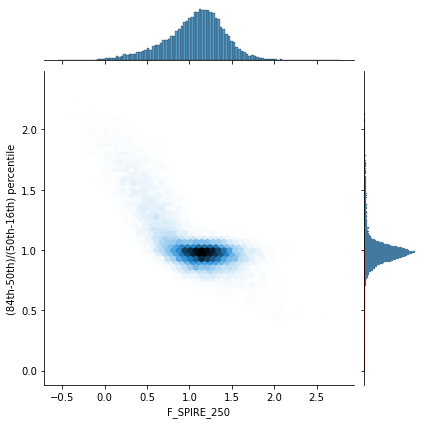

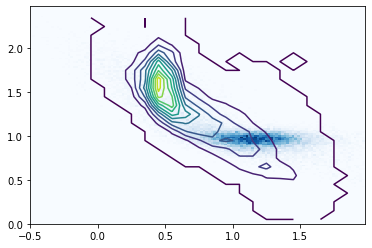

In [8]:
skew=(en1_orig['FErr_SPIRE_250_u']-en1_orig['F_SPIRE_250'])/(en1_orig['F_SPIRE_250']-en1_orig['FErr_SPIRE_250_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(en1_orig['F_SPIRE_250']),y=skew, kind='hex')
plt.plot([0,1],[0,1],c='red')
plt.show()

binsx = np.arange(-0.5,2,0.02)
binsy = np.arange(0,2.5,0.02)
plt.hist2d(np.log10(en1_orig['F_SPIRE_250']),skew,bins=(binsx,binsy),cmap='Blues')

binsx = np.arange(-0.5,2,0.1)
binsy = np.arange(0,2.5,0.1)
skew=(en1['FErr_SPIRE_250_u']-en1['F_SPIRE_250'])/(en1['F_SPIRE_250']-en1['FErr_SPIRE_250_l'])
h,_,_ = np.histogram2d(np.log10(en1['F_SPIRE_250']),skew,bins=(binsx,binsy))
x = get_center(binsx)
y = get_center(binsy)
plt.contour(x,y,h,10)

plt.show()

In [9]:
h.shape

(24, 24)

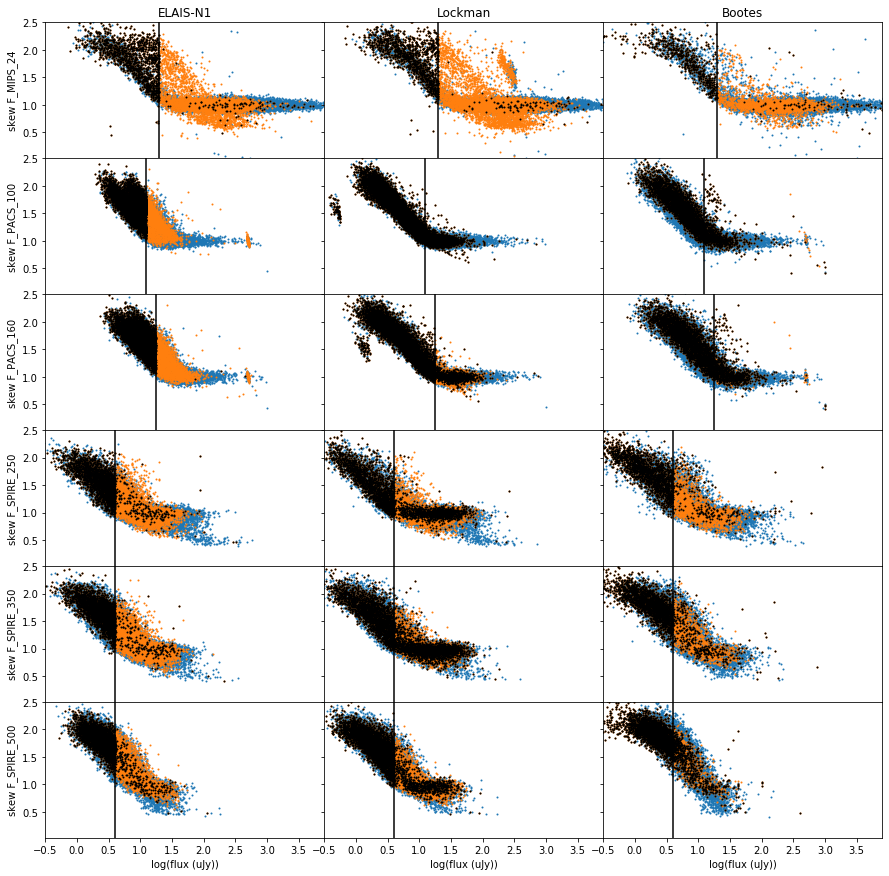

In [52]:
results_tables = [en1,lockman,bootes]
orig_tables = [en1_orig,lockman_orig,bootes_orig]
field_name = ['ELAIS-N1','Lockman','Bootes']
f_names = ['F_MIPS_24','F_PACS_100','F_PACS_160','F_SPIRE_250','F_SPIRE_350','F_SPIRE_500']
f_u_names = ['FErr_MIPS_24_u','FErr_PACS_100_u','FErr_PACS_160_u','FErr_SPIRE_250_u','FErr_SPIRE_350_u','FErr_SPIRE_500_u']
f_l_names = ['FErr_MIPS_24_l','FErr_PACS_100_l','FErr_PACS_160_l','FErr_SPIRE_250_l','FErr_SPIRE_350_l','FErr_SPIRE_500_l']
flag_names = ['flag_mips_24','flag_pacs_100','flag_pacs_160','flag_spire_250','flag_spire_350','flag_spire_500']

flim = [np.log10(20),np.log10(12.5),np.log10(17.5),np.log10(4),np.log10(4),np.log10(4)]

fig, axs = plt.subplots(6,3,sharex='col', sharey='row', gridspec_kw={'hspace': 0, 'wspace': 0})
fig.set_figheight(15)
fig.set_figwidth(15)
for n,tab in enumerate(results_tables):
    
    axs[0,n].set_title(field_name[n])
    axs[len(f_names)-1,n].set_xlabel('log(flux (uJy))')
    for m,band in enumerate(f_names):
        if n==0:
            axs[m,n].set_ylabel('skew {}'.format(f_names[m]))
        flag_names_orig = [name for name in orig_tables[n].colnames if ('flag' in name)][2:]
        
        x = np.log10(orig_tables[n][f_names[m]])
        y = (orig_tables[n][f_u_names[m]]-orig_tables[n][f_names[m]]) / (orig_tables[n][f_names[m]]-orig_tables[n][f_l_names[m]])
        axs[m,n].scatter(x,y,s=1)
        
        #mask = orig_tables[n][flag_names_orig[m]]
        #axs[m,n].scatter(x[mask],y[mask],s=10,c='blue')
        
        x = np.log10(results_tables[n][f_names[m]])
        y = (results_tables[n][f_u_names[m]]-results_tables[n][f_names[m]]) / (results_tables[n][f_names[m]]-results_tables[n][f_l_names[m]])
        
        axs[m,n].scatter(x,y,s=1)
        
        mask = results_tables[n][flag_names[m]]
        axs[m,n].scatter(x[mask],y[mask],s=1,c='black')
        
        axs[m,n].vlines(flim[m],0,2.5)
        
        axs[m,n].set_ylim(0.03,2.5)
        axs[m,n].set_xlim(-0.5,3.9)


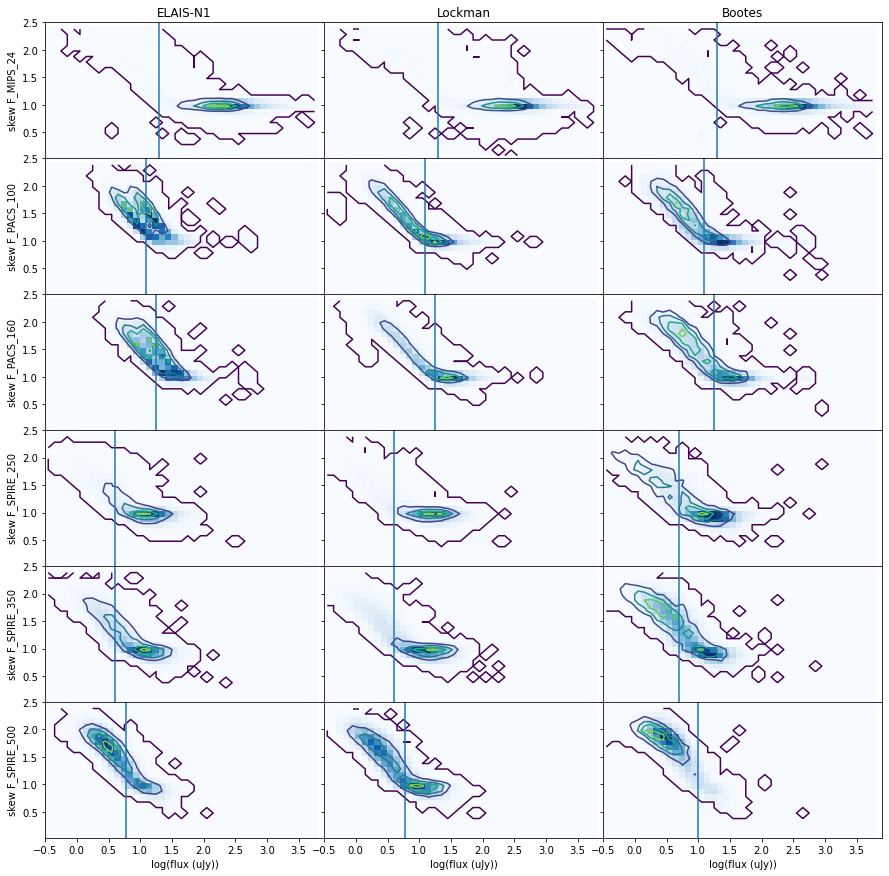

In [10]:
results_tables = [en1,lockman,bootes]
orig_tables = [en1_orig,lockman_orig,bootes_orig]
field_name = ['ELAIS-N1','Lockman','Bootes']
f_names = ['F_MIPS_24','F_PACS_100','F_PACS_160','F_SPIRE_250','F_SPIRE_350','F_SPIRE_500']
f_u_names = ['FErr_MIPS_24_u','FErr_PACS_100_u','FErr_PACS_160_u','FErr_SPIRE_250_u','FErr_SPIRE_350_u','FErr_SPIRE_500_u']
f_l_names = ['FErr_MIPS_24_l','FErr_PACS_100_l','FErr_PACS_160_l','FErr_SPIRE_250_l','FErr_SPIRE_350_l','FErr_SPIRE_500_l']
flag_names = ['flag_mips_24','flag_pacs_100','flag_pacs_160','flag_spire_250','flag_spire_350','flag_spire_500']

flim = [[np.log10(20),np.log10(12.5),np.log10(17.5),np.log10(4),np.log10(4),np.log10(6)],
        [np.log10(20),np.log10(12.5),np.log10(17.5),np.log10(4),np.log10(4),np.log10(6)],
        [np.log10(20),np.log10(12.5),np.log10(17.5),np.log10(5),np.log10(5),np.log10(10)]]

fig, axs = plt.subplots(6,3,sharex='col', sharey='row', gridspec_kw={'hspace': 0, 'wspace': 0})
fig.set_figheight(15)
fig.set_figwidth(15)
for n,tab in enumerate(results_tables):
    
    axs[0,n].set_title(field_name[n])
    axs[len(f_names)-1,n].set_xlabel('log(flux (uJy))')
    for m,band in enumerate(f_names):
        if n==0:
            axs[m,n].set_ylabel('skew {}'.format(f_names[m]))
        xmin = -0.5
        xmax = 3.9
        ymin = 0.03
        ymax = 2.5
        flag_names_orig = [name for name in orig_tables[n].colnames if ('flag' in name)][2:]
        
        binsx = np.arange(xmin,xmax,0.1)
        binsy = np.arange(ymin,ymax,0.1)
        
        x = np.log10(orig_tables[n][f_names[m]])
        y = (orig_tables[n][f_u_names[m]]-orig_tables[n][f_names[m]]) / (orig_tables[n][f_names[m]]-orig_tables[n][f_l_names[m]])
        axs[m,n].hist2d(x,y,bins=(binsx,binsy),cmap='Blues')
        
        #mask = orig_tables[n][flag_names_orig[m]]
        #axs[m,n].scatter(x[mask],y[mask],s=10,c='blue')
        
        x = np.log10(results_tables[n][f_names[m]])
        y = (results_tables[n][f_u_names[m]]-results_tables[n][f_names[m]]) / (results_tables[n][f_names[m]]-results_tables[n][f_l_names[m]])
        binsx = np.arange(xmin,xmax,0.1)
        binsy = np.arange(ymin,ymax,0.1)
        h,_,_ = np.histogram2d(x,y,bins=(binsx,binsy))
        x = get_center(binsx)
        y = get_center(binsy)
        axs[m,n].contour(x,y,h.transpose(),4,color='black')
        

        
        axs[m,n].vlines(flim[n][m],0,2.5)
        
        axs[m,n].set_ylim(0.03,2.5)
        axs[m,n].set_xlim(-0.5,3.9)
        
plt.savefig('plots/XID+_skew_flags.pdf',format='pdf')
plt.show()

In [43]:
y.shape

(24,)

In [44]:
h.shape

(43, 24)

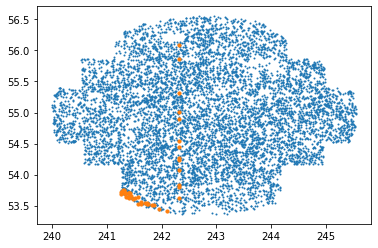

In [30]:
mask = en1['RA_1']<1000
x = en1['RA_1'][mask]
y = en1['Dec_1'][mask]
plt.scatter(x,y,s=1)

mask = (en1['RA_1']<1000) & (np.log10(en1['F_PACS_100'])>2.7) 
x = en1['RA_1'][mask]
y = en1['Dec_1'][mask]
plt.scatter(x,y,s=10)

plt.show()